# 필요 라이브러리 Import

In [ ]:
import os
import json
import shutil

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/빅데이터 및 AI/JSON

/content/drive/MyDrive/빅데이터 및 AI/JSON


In [ ]:
ls

Annotations.zip  Images.zip  JSON.ipynb


## 주석, 이미지 압축 파일 해제

In [ ]:
!unzip Annotations.zip -d Annotations
!unzip Images.zip -d Images

In [ ]:
ls

Annotations/  Annotations.zip  Images/  Images.zip  JSON.ipynb


## 주석, 이미지 파일 확인

In [ ]:
annots = os.listdir('Annotations')
images = os.listdir('Images')

print(len(annots), len(images))

5975 5975


In [ ]:
# 주석 파일
with open(f'Annotations/{annots[0]}') as f:
    json_file = json.load(f)

In [ ]:
json_file.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [ ]:
json_file

In [ ]:
json_file['categories']

[{'id': 1, 'name': 'Animals(Dolls)'},
 {'id': 2, 'name': 'Person'},
 {'id': 3, 'name': 'Garbage bag & sacks'},
 {'id': 4, 'name': 'Construction signs & Parking prohibited board'},
 {'id': 5, 'name': 'Traffic cone'},
 {'id': 6, 'name': 'Box'},
 {'id': 7, 'name': 'Stones on road'},
 {'id': 8, 'name': 'Pothole on road'},
 {'id': 9, 'name': 'Filled pothole'},
 {'id': 10, 'name': 'Manhole'}]

In [ ]:
json_file['annotations']

[{'area': 3038.917435688946,
  'bbox': [864.6860136485835, 0, 32.64630867856897, 93.08609636727098],
  'category_id': 2,
  'id': 1,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 1572.524883240999,
  'bbox': [679.0911488752403,
   56.67131391536984,
   31.350088548927943,
   50.16014167828479],
  'category_id': 5,
  'id': 2,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 570.2147366929746,
  'bbox': [672.5799766381552,
   57.877086551867066,
   12.781189946870654,
   44.613587550397526],
  'category_id': 5,
  'id': 3,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []}]

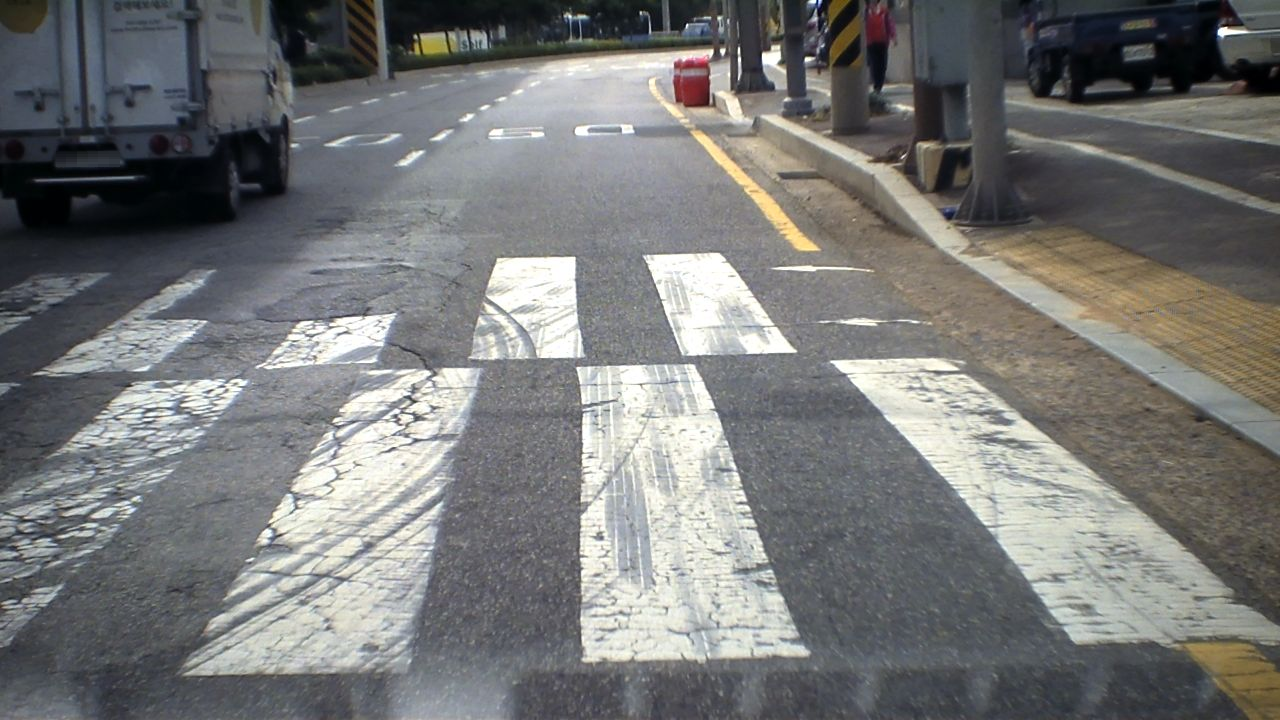

In [ ]:
# 이미지 파일
Image.open(f'Images/{images[0]}')

[864.6860136485835, 0, 897.3323223271525, 93.08609636727098]
[679.0911488752403, 56.67131391536984, 710.4412374241682, 106.83145559365462]
[672.5799766381552, 57.877086551867066, 685.3611665850259, 102.49067410226459]


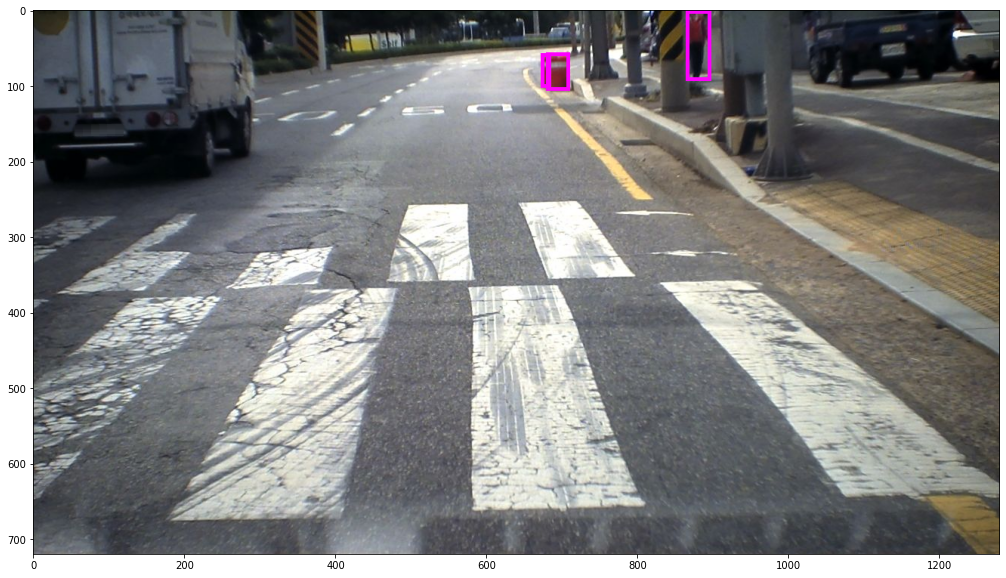

In [ ]:
# 이미지에 주석 적용
img_open = Image.open(f'Images/{images[0]}').convert('RGBA')
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)

# for obj in json_file['annotations']:
#   bbox1 = [obj["bbox"][0],
#             obj["bbox"][1],
#             obj["bbox"][0] + obj["bbox"][2],
#             obj["bbox"][1] + obj["bbox"][3]]
#   print(bbox1)

#   draw = ImageDraw.Draw(img_open)
#   draw.rectangle(((bbox1[0], bbox1[1], bbox1[2], bbox1[3])), outline=(255, 0, 255), width=5)

plt.figure(figsize=(20,10))
plt.imshow(np.array(img_open))
plt.show()

# 카테고리에 따라 파일 분류

- 7 : Stones on road
- 8 : Pothole on road
- 9 : Filled pothole
- 중복은 제외

In [ ]:
stone = []
pothole = []
filled = []
for a in annots:
    # counts = [0, 0, 0]
    # with open(f'Annotations/{a}') as f:
    #     instance = json.load(f)
    # annotations = instance['annotations']
    # for annot in annotations:
    #     category_id = annot['category_id']
    #     if category_id == 7:
    #         counts[0] += 1
    #     elif category_id == 8:
    #         counts[1] += 1
    #     elif category_id == 9:
    #         counts[2] += 1
    # u = counts or [1, 1, 1]
    # is_unique = True if sum(u) == 1 else False
    # if is_unique:
    #     idx = u.index(1)
    #     if idx == 0:
    #         stone.append(a)
    #     elif idx == 1:
    #         pothole.append(a)
    #     else:
    #         filled.append(a)

In [ ]:
print(len(stone), len(pothole), len(filled))

82 231 433


## 분류된 이미지 새 디렉토리로 이동

In [ ]:
def make_output_dir(category):
    os.makedirs(f'{category}/Annotations')
    os.makedirs(f'{category}/Images')    

In [ ]:
make_output_dir('0. stone')
make_output_dir('1. pothole')
make_output_dir('2. filled')

In [ ]:
def copy_files(json_lst, category):
    for j in json_lst:
        # image = j[:-10] + '.png'
        # annot_src = f'Annotations/{j}'
        # annot_dst = f'{category}/Annotations/'
        # shutil.copy(annot_src, annot_dst)

        # image_src = f'Images/{image}'
        # image_dst = f'{category}/Images/'
        # shutil.copy(image_src, image_dst)

In [ ]:
copy_files(stone, '0. stone')
copy_files(pothole, '1. pothole')
copy_files(filled, '2. filled')

In [ ]:
num_stone = os.listdir('0. stone/Images')
num_pothole = os.listdir('1. pothole/Images')
num_filled  = os.listdir('2. filled/Images')

print(len(num_stone), len(num_pothole), len(num_filled))

82 231 433
